### Zadanie

1. Načítajte súbor `Accidents.csv`, rozdeľte ho na tri tabuľky podľa hodnôt atribútu `Accident_Severity` (do prvej tabuľky vyberte iba hodnoty 1 - `Fatal`, do druhej 2 - `Serious` a do tretej 3 - `Slight`). (2b)



In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
sns.set()
accidents = pd.read_csv("./data/accidents.csv")

In [59]:
#split accidents
#zistim indexy pre jednotlive zaznamy
accidents_Fatal_i = np.where(accidents.Accident_Severity==1)
accidents_Serious_i = np.where(accidents.Accident_Severity==2)
accidents_Slight_i = np.where(accidents.Accident_Severity==3)

#vytvorim DF podla indexov
accidents_Fatal = accidents.iloc[accidents_Fatal_i]
accidents_Serious = accidents.iloc[accidents_Serious_i]
accidents_Slight = accidents.iloc[accidents_Slight_i]


2. Z tabuľky pre hodnoty `Slight` náhodne vyberte 10% príkladov pomocou metódy `sample`. Nasledujúci príklad kódu zobrazuje použitie tejto metódy. (2b)

In [ ]:
# `frac` udáva koľko príkladov sa má náhodne vybrať (0.1 = 10%), `random_state` inicializuje generátor
# náhodných čísel, aby sme vždy dostali rovnaký výber
#sample_data = accidents_slight.sample(frac=0.1, random_state=1234)


In [60]:
accidents_Slight_sample = accidents_Slight.sample(frac=0.1, random_state=1234)

3. Spojte všetky tri tabuľky do upravenej tabuľky `Accidents`, ktorá bude obsahovať 10% príkladov `Slight` a všetky príklady závažnosti `Fatal` a `Serious`. Po spojení by ste mali mať 29 650 príkladov. (2b)

In [61]:
Accidents = pd.concat([accidents_Fatal, accidents_Serious, accidents_Slight_sample])


4. Spojte upravenú tabuľku `Accidents` s tabuľkou `Vehicles` podľa kľúča `Accident_Index` tak, aby vo výslednej tabuľke boli iba vozidla nehôd z upravenej tabuľky `Accidents`. Po spojení by ste mali dostať redukovanú trénovaciu množinu s menším počtom príkladov, ktorú budete ďalej používať pre analýzu dát. Keďže sme zmenšili počet menej závažných príkladov, zvýšili sme tým váhu príkladov s väčšou závažnosťou. (2b)


In [62]:
Vehicles = pd.read_csv("./data/vehicles.csv")


In [63]:
Accidents_all = pd.merge(left=Accidents, right=Vehicles, left_on="Accident_Index", right_on="Accident_Index", how="left")
len(Accidents_all)

79382

5. Pre ďalšiu analýzu vyberte iba nasledujúce atribúty:
    * `Day_of_Week`
    * `1st_Road_Class`
    * `Road_Type`
    * `Light_Conditions`
    * `Weather_Conditions`     
    * `Road_Surface_Conditions`
    * `Urban_or_Rural_Area`
    * `Vehicle_Type`
    * `Sex_of_Driver`
    * `Age_of_Driver`
    * `Engine_Capacity_(CC)`
    * `Age_of_Vehicle`
    * `Accident_Severity` 
    
Takúto selekciu atribútov urobíme kvôli odstráneniu redundantných atribútov v datasete. Nepoužijeme redundantné atribúty popisujúce napr. geolokalitu, atď., prípadne odstránime atribúty, ktoré pre predikciu nemôžu byť použité (nie sú známe pred výskytom samotnej nehody). (2b)


In [64]:
Accidents_new = Accidents_all[["Day_of_Week", "1st_Road_Class", "Road_Type", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Urban_or_Rural_Area", "Vehicle_Type", "Sex_of_Driver", "Age_of_Driver", "Engine_Capacity_(CC)", "Age_of_Vehicle", "Accident_Severity"]]
Accidents_new.shape

(79382, 13)

6. Spočítajte počet chýbajúcich hodnôt pre jednotlivé atribúty. Vhodne doplňte chýbajúce hodnoty (pozor: chýbajúce hodnoty sú označené -1).(4b)


In [65]:
Accidents_new.replace(-1, np.nan, inplace=True)
Accidents_new.isna().sum()

C:\Users\mateovak\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Day_of_Week                    0
1st_Road_Class                 0
Road_Type                      0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions       80
Urban_or_Rural_Area            0
Vehicle_Type                  14
Sex_of_Driver                  7
Age_of_Driver               7784
Engine_Capacity_(CC)       24978
Age_of_Vehicle             27406
Accident_Severity              0
dtype: int64

In [66]:
Accidents_new["Road_Surface_Conditions"].value_counts()

1.0    54700
2.0    23007
4.0     1147
3.0      358
5.0       90
Name: Road_Surface_Conditions, dtype: int64

In [67]:
Accidents_new["Road_Surface_Conditions"].fillna(1.0, inplace=True)
Accidents_new["Road_Surface_Conditions"].isna().sum() 

C:\Users\mateovak\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [68]:
Accidents_new["Vehicle_Type"].value_counts()

9.0     55695
5.0      4434
1.0      3929
19.0     3514
21.0     2463
3.0      2121
11.0     2018
2.0      1321
8.0      1180
4.0       908
20.0      698
90.0      532
10.0      281
17.0      230
16.0       32
18.0       12
Name: Vehicle_Type, dtype: int64

In [69]:
Accidents_new["Vehicle_Type"].fillna(9.0, inplace=True)
Accidents_new["Vehicle_Type"].isna().sum()

0

In [70]:
Accidents_new["Sex_of_Driver"].value_counts()

1.0    56005
2.0    19020
3.0     4350
Name: Sex_of_Driver, dtype: int64

In [71]:
Accidents_new["Sex_of_Driver"].fillna(3.0, inplace=True)
Accidents_new["Sex_of_Driver"].isna().sum()

0

In [72]:
ptable = pd.pivot_table(Accidents_new, index="Sex_of_Driver", values="Age_of_Driver", aggfunc="median")

def replace_missing_age(row):
    age = row["Age_of_Driver"]
    sex = row["Sex_of_Driver"]
    if pd.isna(age):
        return ptable["Age_of_Driver"][sex]
    else:
        return age

Accidents_new["Age_of_Driver"] = Accidents_new.apply(replace_missing_age, axis=1)
Accidents_new["Age_of_Driver"].isna().sum()

C:\Users\mateovak\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0

In [73]:
ttable = pd.pivot_table(Accidents_new, index="Vehicle_Type", values="Engine_Capacity_(CC)", aggfunc="median")
ttable

,Engine_Capacity_(CC)
Vehicle_Type,
2.0,49.0
3.0,124.0
4.0,400.0
5.0,749.0
8.0,1995.0
9.0,1598.0
10.0,2496.0
11.0,7300.0
17.0,5206.5


In [74]:
Accidents_new.loc[Accidents_new["Vehicle_Type"] == 1.0, "Engine_Capacity_(CC)"] = 0.0
Accidents_new.loc[Accidents_new["Vehicle_Type"] == 16.0, "Engine_Capacity_(CC)"] = 0.0
Accidents_new.loc[Accidents_new["Vehicle_Type"] == 18.0, "Engine_Capacity_(CC)"] = 11116.0
ttable = pd.pivot_table(Accidents_new, index="Vehicle_Type", values="Engine_Capacity_(CC)", aggfunc="median")
def replace_missing_engine(row):
    engine = row["Engine_Capacity_(CC)"]
    vehicle = row["Vehicle_Type"]
    if pd.isna(engine):
        return ttable["Engine_Capacity_(CC)"][vehicle]
    else:
        return engine

Accidents_new["Engine_Capacity_(CC)"] = Accidents_new.apply(replace_missing_engine, axis=1)
Accidents_new["Engine_Capacity_(CC)"].isna().sum()

C:\Users\mateovak\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\mateovak\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0

In [75]:
Accidents_new["Vehicle_Type"].isna().sum()

0

In [76]:
#Age_of_Vehicle
atable = pd.pivot_table(Accidents_new, index="Vehicle_Type", values="Age_of_Vehicle", aggfunc="median")
atable

,Age_of_Vehicle
Vehicle_Type,
2.0,3.0
3.0,4.0
4.0,9.0
5.0,5.0
8.0,5.0
9.0,7.0
10.0,6.0
11.0,6.0
17.0,5.0


In [77]:
mean_value = Accidents_new["Age_of_Vehicle"].mean()
mean_value = int(mean_value)
mean_value = float(mean_value)
Accidents_new.loc[Accidents_new["Vehicle_Type"] == 1.0, "Age_of_Vehicle"] = 0.0
Accidents_new.loc[Accidents_new["Vehicle_Type"] == 16.0, "Age_of_Vehicle"] = 0.0
Accidents_new.loc[Accidents_new["Vehicle_Type"] == 18.0, "Age_of_Vehicle"] = mean_value
atable = pd.pivot_table(Accidents_new, index="Vehicle_Type", values="Age_of_Vehicle", aggfunc="median")
def replace_missing_vehicle(row):
    age = row["Age_of_Vehicle"]
    vehicle = row["Vehicle_Type"]
    if pd.isna(age):
        return atable["Age_of_Vehicle"][vehicle]
    else:
        return age

Accidents_new["Age_of_Vehicle"] = Accidents_new.apply(replace_missing_vehicle, axis=1)
Accidents_new["Age_of_Vehicle"].isna().sum()

C:\Users\mateovak\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0

In [78]:
Accidents_new.isna().sum()

Day_of_Week                0
1st_Road_Class             0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Vehicle_Type               0
Sex_of_Driver              0
Age_of_Driver              0
Engine_Capacity_(CC)       0
Age_of_Vehicle             0
Accident_Severity          0
dtype: int64

7. Pomocou konfigenčnej tabuľky vyjadrite závislosti medzi nasledujúcimi atribútmi a cieľovým atribútom `Accident_Severity`:
* `Day_of_Week` 
* `Sex_of_Driver`
* `Age_of_Driver` (nutné vhodne diskretizovať tento atribút)

Použite niektorú z vizualizácií knižnice seaborn na grafické zobrazenie týchto vzťahov. (5b)


In [79]:
Age_of_Driver_min = Accidents_new["Age_of_Driver"].min()
Age_of_Driver_min

3.0

In [80]:
Age_of_Driver_max = Accidents_new["Age_of_Driver"].max()
Age_of_Driver_max

98.0

In [144]:
#intervaly pre diskretizaciu do 18, do 25, do 40, do 60, nad 60
Accidents_ord = Accidents_new
Accidents_ord["Age_of_Driver_ord"] = pd.cut(Accidents_new["Age_of_Driver"], bins=[0, 18, 25, 40, 60, Age_of_Driver_max], include_lowest=True, labels=["teens", "young", "adult", "senior", "old"])
Accidents_ord["Age_of_Driver_ord"].value_counts()

C:\Users\mateovak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


adult     32284
senior    21210
young     13273
old        6644
teens      5971
Name: Age_of_Driver_ord, dtype: int64

In [145]:
draw = pd.pivot_table(Accidents_ord, index=["Day_of_Week", "Sex_of_Driver", "Age_of_Driver_ord"], values="Accident_Severity")
draw

Accident_Severity
Day_of_Week Sex_of_Driver Age_of_Driver_ord                   
1           1.0           teens                       2.249645
                          young                       2.259341
                          adult                       2.272478
                          senior                      2.192625
                          old                         2.197044
...                                                        ...
7           3.0           teens                       1.500000
                          young                       2.294118
                          adult                       2.352601
                          senior                      2.250000
                          old                         2.000000

[101 rows x 1 columns]

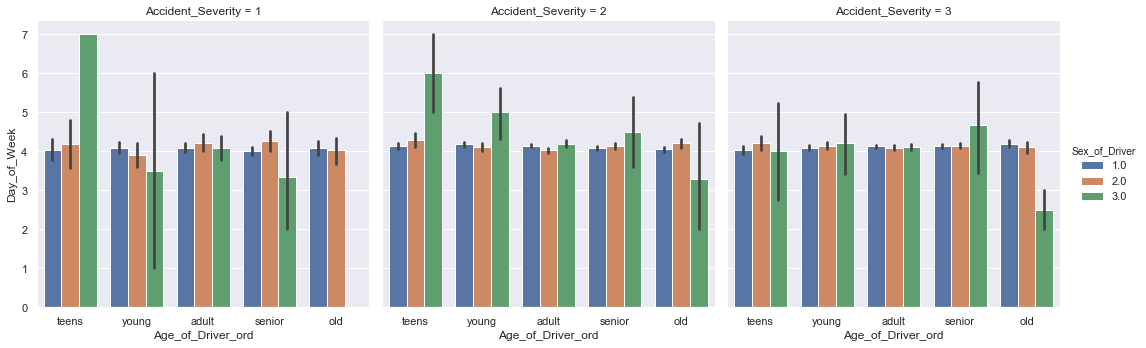

In [146]:
g = sns.catplot(x="Age_of_Driver_ord", y="Day_of_Week", hue="Sex_of_Driver", col="Accident_Severity", data=Accidents_ord, kind="bar")

8. Vytvorte dátovú množinu, v ktorej nahradíte všetky nominálne atribúty za číselné alebo binárne. (3b)

In [147]:
Accidents_dat = Accidents_new
Accidents_dat.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,984.0,5.0,1,adult,1,2
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,0.0,0.0,1,young,0,0
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,9600.0,5.0,1,senior,3,2
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,0.0,0.0,1,young,0,0
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1596.0,3.0,1,adult,1,1


In [38]:
#atributy na normalizaciu Day_of_Week, 1st_Road_Class,Light_Conditions,Weather_Conditions,Accident_Severity
#atributy na encoder Road_Type,Road_Surface_Condition,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver
#atributy na diskretizaciu Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
#diskretizacia Age_of_Driver-Age_of_Driver_ord,Engine_Capacity_(CC)-Engine_Capacity_ord,Age_of_Vehicle-Age_of_Vehicle_ord


In [148]:
#diskretizacia Engine_Capacity_(CC)-do 500, do 2100, do 3500, do 10000, nad 10000
Engine_Capacity_min = Accidents_new["Engine_Capacity_(CC)"].min()
Engine_Capacity_max = Accidents_new["Engine_Capacity_(CC)"].max()
Accidents_dat["Engine_Capacity_ord"] = pd.cut(Accidents_new["Engine_Capacity_(CC)"], bins=[0, 500, 2100, 3500, 10000, Engine_Capacity_max], include_lowest=True, labels=["small_cc", "middle_cc", "high_cc", "very_high_cc", "ultra_high_cc"])
Accidents_dat["Engine_Capacity_ord"].value_counts()

C:\Users\mateovak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


middle_cc        58525
small_cc          8326
high_cc           6848
very_high_cc      3632
ultra_high_cc     2051
Name: Engine_Capacity_ord, dtype: int64

In [149]:
Accidents_dat.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,984.0,5.0,1,adult,middle_cc,2
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,0.0,0.0,1,young,small_cc,0
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,9600.0,5.0,1,senior,very_high_cc,2
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,0.0,0.0,1,young,small_cc,0
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1596.0,3.0,1,adult,middle_cc,1


In [150]:
#diskretizacia Age_of_Vehicle-do 3, do 7, do 10, do 15, nad 15
Age_of_Vehicle_min = Accidents_new["Age_of_Vehicle"].min()
Age_of_Vehicle_max = Accidents_new["Age_of_Vehicle"].max()
Accidents_dat["Age_of_Vehicle_ord"] = pd.cut(Accidents_new["Age_of_Vehicle"], bins=[0, 1, 3, 7, 10, Age_of_Vehicle_max], include_lowest=True, labels=["fresh", "new", "used", "old", "old-timer"])
Accidents_dat["Age_of_Vehicle_ord"].value_counts()

C:\Users\mateovak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


used         39654
new          10502
old          10257
old-timer     9896
fresh         9073
Name: Age_of_Vehicle_ord, dtype: int64

In [151]:
Accidents_dat.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,984.0,5.0,1,adult,middle_cc,used
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,0.0,0.0,1,young,small_cc,fresh
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,9600.0,5.0,1,senior,very_high_cc,used
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,0.0,0.0,1,young,small_cc,fresh
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1596.0,3.0,1,adult,middle_cc,new


In [152]:
#premapujem diskretizovane atributy
Accidents_dat["Age_of_Driver_ord"] = Accidents_dat["Age_of_Driver_ord"].map({"teens": 0, "young": 1, "adult": 2, "senior": 3, "old": 4})
#Accidents_new["Engine_Capacity_ord"] = Accidents_new["Engine_Capacity_ord"].map({"small_cc": 0, "middle_cc": 1, "high_cc": 2, "very_high_cc": 3, "ultra_high_cc": 4})
#Accidents_new["Age_of_Vehicle_ord"] = Accidents_new["Age_of_Driver_ord"].map({"fresh": 0, "new": 1, "used": 2, "old": 3, "old-timer": 4})
Accidents_dat.head()

C:\Users\mateovak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,984.0,5.0,1,2,middle_cc,used
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,0.0,0.0,1,1,small_cc,fresh
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,9600.0,5.0,1,3,very_high_cc,used
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,0.0,0.0,1,1,small_cc,fresh
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1596.0,3.0,1,2,middle_cc,new


In [153]:
#premapujem diskretizovane atributy
#Accidents_dat["Age_of_Driver_ord"] = Accidents_dat["Age_of_Driver_ord"].map({"teens": 0, "young": 1, "adult": 2, "senior": 3, "old": 4})
Accidents_dat["Engine_Capacity_ord"] = Accidents_dat["Engine_Capacity_ord"].map({"small_cc": 0, "middle_cc": 1, "high_cc": 2, "very_high_cc": 3, "ultra_high_cc": 4})
#Accidents_new["Age_of_Vehicle_ord"] = Accidents_new["Age_of_Driver_ord"].map({"fresh": 0, "new": 1, "used": 2, "old": 3, "old-timer": 4})
Accidents_dat.head()

C:\Users\mateovak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,984.0,5.0,1,2,1,used
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,0.0,0.0,1,1,0,fresh
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,9600.0,5.0,1,3,3,used
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,0.0,0.0,1,1,0,fresh
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1596.0,3.0,1,2,1,new


In [154]:
#premapujem diskretizovane atributy
#Accidents_dat["Age_of_Driver_ord"] = Accidents_dat["Age_of_Driver_ord"].map({"teens": 0, "young": 1, "adult": 2, "senior": 3, "old": 4})
#Accidents_dat["Engine_Capacity_ord"] = Accidents_new["Engine_Capacity_ord"].map({"small_cc": 0, "middle_cc": 1, "high_cc": 2, "very_high_cc": 3, "ultra_high_cc": 4})
Accidents_dat["Age_of_Vehicle_ord"] = Accidents_dat["Age_of_Vehicle_ord"].map({"fresh": 0, "new": 1, "used": 2, "old": 3, "old-timer": 4})
Accidents_dat.head()

C:\Users\mateovak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,984.0,5.0,1,2,1,2
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,0.0,0.0,1,1,0,0
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,9600.0,5.0,1,3,3,2
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,0.0,0.0,1,1,0,0
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1596.0,3.0,1,2,1,1


In [155]:
col_encod = ["Road_Type", "Urban_or_Rural_Area", "Vehicle_Type", "Sex_of_Driver"]
Accidents_dat = Accidents_dat.drop(col_encod, axis=1)
col_drop = ["Engine_Capacity_(CC)", "Age_of_Vehicle", "Age_of_Driver"]
Accidents_dat = Accidents_dat.drop(col_drop, axis=1)
Accidents_dat.head()

,Day_of_Week,1st_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,4,3,1,1,1.0,1,2,1,2
1,4,3,1,1,1.0,1,1,0,0
2,4,5,1,1,1.0,1,3,3,2
3,5,4,1,1,2.0,1,1,0,0
4,5,4,1,1,2.0,1,2,1,1


In [156]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
norm_array = min_max.fit_transform(Accidents_dat)
Accidents_dat = pd.DataFrame(norm_array, columns = Accidents_dat.columns)
Accidents_dat.head()

,Day_of_Week,1st_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,0.500000,0.4,0.0,0.0,0.00,0.0,0.50,0.25,0.50
1,0.500000,0.4,0.0,0.0,0.00,0.0,0.25,0.00,0.00
2,0.500000,0.8,0.0,0.0,0.00,0.0,0.75,0.75,0.50
3,0.666667,0.6,0.0,0.0,0.25,0.0,0.25,0.00,0.00
4,0.666667,0.6,0.0,0.0,0.25,0.0,0.50,0.25,0.25


In [157]:
Accidents_dat["Road_Type"] = Accidents_new["Road_Type"]
Accidents_dat["Sex_of_Driver"] = Accidents_new["Sex_of_Driver"]
Accidents_dat["Urban_or_Rural_Area"] = Accidents_new["Urban_or_Rural_Area"]
Accidents_dat["Vehicle_Type"] = Accidents_new["Vehicle_Type"]
Accidents_dat.head()

,Day_of_Week,1st_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord,Road_Type,Sex_of_Driver,Urban_or_Rural_Area,Vehicle_Type
0,0.500000,0.4,0.0,0.0,0.00,0.0,0.50,0.25,0.50,2,1.0,1,5.0
1,0.500000,0.4,0.0,0.0,0.00,0.0,0.25,0.00,0.00,2,1.0,1,1.0
2,0.500000,0.8,0.0,0.0,0.00,0.0,0.75,0.75,0.50,6,1.0,1,11.0
3,0.666667,0.6,0.0,0.0,0.25,0.0,0.25,0.00,0.00,6,1.0,1,1.0
4,0.666667,0.6,0.0,0.0,0.25,0.0,0.50,0.25,0.25,6,1.0,1,9.0


In [158]:
Accidents_dat = pd.get_dummies(Accidents_dat, columns=["Sex_of_Driver", "Road_Type", "Urban_or_Rural_Area", "Vehicle_Type"])
Accidents_dat["Accident_Severity"] = Accidents_new["Accident_Severity"]
Accidents_dat.head()

,Day_of_Week,1st_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord,Sex_of_Driver_1.0,...,Vehicle_Type_9.0,Vehicle_Type_10.0,Vehicle_Type_11.0,Vehicle_Type_16.0,Vehicle_Type_17.0,Vehicle_Type_18.0,Vehicle_Type_19.0,Vehicle_Type_20.0,Vehicle_Type_21.0,Vehicle_Type_90.0
0,0.500000,0.4,0.0,0.0,0.00,1,0.50,0.25,0.50,1,...,0,0,0,0,0,0,0,0,0,0
1,0.500000,0.4,0.0,0.0,0.00,1,0.25,0.00,0.00,1,...,0,0,0,0,0,0,0,0,0,0
2,0.500000,0.8,0.0,0.0,0.00,1,0.75,0.75,0.50,1,...,0,0,1,0,0,0,0,0,0,0
3,0.666667,0.6,0.0,0.0,0.25,1,0.25,0.00,0.00,1,...,0,0,0,0,0,0,0,0,0,0
4,0.666667,0.6,0.0,0.0,0.25,1,0.50,0.25,0.25,1,...,1,0,0,0,0,0,0,0,0,0


In [159]:
Accidents_dat.shape

(79382, 37)

9. Rozdeľte dáta na trénovaciu a testovaciu množinu v pomere 70/30. Ako cieľový atribút použite atribút `Accident_Severity`. (2b)

In [160]:
X_Accidents = Accidents_dat.drop("Accident_Severity", axis=1) 
y_Accidents = Accidents_dat["Accident_Severity"] 
print(X_Accidents.shape) 
print(y_Accidents.shape)

(79382, 36)
(79382,)


In [161]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_Accidents, y_Accidents, test_size=0.3, random_state=1)

10. Spočítajte pomocou funkcie `SelectKBest` a `mutual_score_info` významosti jednotlivých atribútov pre predikciu v trénovacej množine. Skúste získané informácie využiť pri predspracovaní dát pre niektoré z modelov. (3b)

In [162]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k="all").fit(X_train, y_train)
print(mutual_info_classif(X_train, y_train, random_state = 123))

[0.         0.00629634 0.00990651 0.00678539 0.         0.
 0.         0.         0.00391863 0.00414827 0.00068462 0.00216406
 0.00128897 0.00160505 0.00560136 0.00018221 0.00016951 0.01891143
 0.01465631 0.00051953 0.00039916 0.00453    0.00412052 0.00092431
 0.00991028 0.00331849 0.00802986 0.         0.00354115 0.
 0.00181255 0.00040228 0.00053171 0.00188323 0.00571012 0.        ]


Atribut 0: 0.003341
Atribut 1: 0.006191
Atribut 2: 0.006629
Atribut 3: 0.002784
Atribut 4: 0.001688
Atribut 5: 0.000443
Atribut 6: 0.010354
Atribut 7: 0.003256
Atribut 8: 0.005600
Atribut 9: 0.002298
Atribut 10: 0.000000
Atribut 11: 0.003515
Atribut 12: 0.000000
Atribut 13: 0.000082
Atribut 14: 0.002386
Atribut 15: 0.000231
Atribut 16: 0.000158
Atribut 17: 0.019575
Atribut 18: 0.016011
Atribut 19: 0.000390
Atribut 20: 0.000000
Atribut 21: 0.000928
Atribut 22: 0.000000
Atribut 23: 0.000000
Atribut 24: 0.007549
Atribut 25: 0.001817
Atribut 26: 0.004828
Atribut 27: 0.003420
Atribut 28: 0.000000
Atribut 29: 0.001269
Atribut 30: 0.000000
Atribut 31: 0.000000
Atribut 32: 0.001138
Atribut 33: 0.004037
Atribut 34: 0.006567
Atribut 35: 0.000000


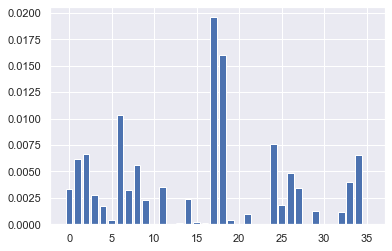

In [163]:
for i in range(len(fs.scores_)):
	print('Atribut %d: %f' % (i, fs.scores_[i]))
    
    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

11. Natrénujte rôzne klasifikačné modely pre predikciu atribútu `Accident_Severity`. Natrénujte nasledovné modely s prednastavenými parametrami:
* k-najbližších susedov
* Rozhodovacie stromy
* Random forests

Jednotlivé modely otestujte pomocou 10-násobnej krížovej validácie pomocou metriky `accuracy`. 

Pozor - pre jednotlivé modely zvoľte vhodný spôsob predspracovania (možná modifikácia predspracovania v kroku 8). (6b) 

In [164]:
# KNN-pouzijeme data z predchadzajucich cviceni
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()                       
model_knn.fit(X_train, y_train)                           
knn_model = model_knn.predict(X_test) 

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_knn = accuracy_score
print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, knn_model)}")

Presnosť (accuracy) modelu: 0.5254671425572118


In [165]:
from sklearn.model_selection import cross_validate 
scoring = ['accuracy']
scores = cross_validate(model_knn, X_train, y_train, scoring=scoring, cv=10, return_train_score=False)        
sorted(scores.keys())
print(scores['test_accuracy'])

[0.52968694 0.53220583 0.51259446 0.51826525 0.52474357 0.51718553
 0.52348389 0.52673267 0.52493249 0.51773177]


In [166]:
#Decision trees
Accidents_dt = Accidents_new
Accidents_dt.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,984.0,5.0,1,2,1,2
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,0.0,0.0,1,1,0,0
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,9600.0,5.0,1,3,3,2
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,0.0,0.0,1,1,0,0
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1596.0,3.0,1,2,1,1


In [167]:
Accidents_dt = Accidents_dt.drop(columns=["Age_of_Driver_ord", "Engine_Capacity_ord","Age_of_Vehicle_ord", "Engine_Capacity_(CC)", "Age_of_Vehicle" ])
Accidents_dt.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Accident_Severity
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,1
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,1
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,1
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,1
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1


In [168]:
Accidents_dt = pd.get_dummies(Accidents_dt, columns=["Sex_of_Driver", "Road_Type", "Urban_or_Rural_Area", "Vehicle_Type"])
Accidents_dt.head()

,Day_of_Week,1st_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Age_of_Driver,Accident_Severity,Sex_of_Driver_1.0,Sex_of_Driver_2.0,Sex_of_Driver_3.0,...,Vehicle_Type_9.0,Vehicle_Type_10.0,Vehicle_Type_11.0,Vehicle_Type_16.0,Vehicle_Type_17.0,Vehicle_Type_18.0,Vehicle_Type_19.0,Vehicle_Type_20.0,Vehicle_Type_21.0,Vehicle_Type_90.0
0,4,3,1,1,1.0,40.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,3,1,1,1.0,20.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,5,1,1,1.0,59.0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,5,4,1,1,2.0,25.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,4,1,1,2.0,29.0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [169]:
X_Accidents_dt = Accidents_dt.drop("Accident_Severity", axis=1) 
y_Accidents_dt = Accidents_dt["Accident_Severity"] 
X_train, X_test, y_train, y_test = train_test_split(X_Accidents_dt, y_Accidents_dt, test_size=0.3, random_state=1)

In [170]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()   
model_dt = model_dt.fit(X_train, y_train)        
dt_model = model_dt.predict(X_test)       

In [171]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score
print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, dt_model)}")

Presnosť (accuracy) modelu: 0.4897333613268948


In [172]:
from sklearn.model_selection import cross_validate 
scoring = ['accuracy']
scores = cross_validate(model_dt, X_train, y_train, scoring=scoring, cv=10, return_train_score=False)        
sorted(scores.keys())
print(scores['test_accuracy'])

[0.48722562 0.48830515 0.47786974 0.50854778 0.49613101 0.48803311
 0.48713335 0.4950495  0.47830783 0.49450945]


In [174]:
Accidents_new.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ord,Engine_Capacity_ord,Age_of_Vehicle_ord
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,984.0,5.0,1,2,1,2
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,0.0,0.0,1,1,0,0
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,9600.0,5.0,1,3,3,2
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,0.0,0.0,1,1,0,0
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1596.0,3.0,1,2,1,1


In [177]:
#Random forests
Accidents_rf = Accidents_new
Accidents_rf = Accidents_rf.drop(columns=["Engine_Capacity_ord","Age_of_Vehicle_ord", "Engine_Capacity_(CC)", "Age_of_Vehicle"])
X_Accidents_rf = Accidents_rf.drop("Accident_Severity", axis=1) 
y_Accidents_rf = Accidents_rf["Accident_Severity"] 
X_train, X_test, y_train, y_test = train_test_split(X_Accidents_rf, y_Accidents_rf, test_size=0.3, random_state=1)

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_rf = RandomForestClassifier(n_estimators=500, max_depth=None)
model_rf = model_rf.fit(X_train, y_train)

rf_model = model_rf.predict(X_test)
accuracy_rf = accuracy_score

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, rf_model)}")


Presnosť (accuracy) modelu: 0.5303800125971027


In [179]:
from sklearn.model_selection import cross_validate 
scoring = ['accuracy']
scores = cross_validate(model_rf, X_train, y_train, scoring=scoring, cv=10, return_train_score=False)        
sorted(scores.keys())
print(scores['test_accuracy'])

[0.525009   0.51763224 0.51781216 0.53464099 0.52186432 0.52816268
 0.53248155 0.5229523  0.52169217 0.53771377]


12. Porovnajte natrénované modely aj pomocou ROC krivky testovacej množine. Identifikujte model, ktorý dáva najlepšie výsledky s prednastavenými parametrami. 
V tomto kroku sa posnažte vyladiť model nájdením najvhodnejších parametrov pomocou `GridSearchCV`. Nájdite a vypíšte najlepšiu kombináciu parametrov. (4b)

In [207]:
#Grid_search pre RandomForest
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_Accidents_rf, y_Accidents_rf, test_size=0.3, random_state=1)

rfc = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 50, 100, 150, 200, 250, 300],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8,9,10],'criterion' :['gini', 'entropy']}
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid.fit(X_train, y_train)

print("Najlepšia kombinácia parametrov je:")
print(grid.best_params_)
print()
print("Hodnota presnosti modelu pri tejto kombinacii je:")
print(grid.best_score_)

Najlepšia kombinácia parametrov je:
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}

Hodnota presnosti modelu pri tejto kombinacii je:
0.5709143916353231


13. Natrénujte na celej trénovacej množine model s najlepšími parametrami. Model otestujte na testovacej množine. Vyhodnoťte model pomocou metrík `accuracy`, `precision` a `recall`. Vypíšte preň `confusion matrix`. (3b)

In [208]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X_Accidents_rf, y_Accidents_rf, test_size=0.3, random_state=1)

rf = RandomForestClassifier(n_estimators=200, max_depth=10, criterion="gini", max_features="auto")
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test) 

print("Accuracy: %0.3f" % accuracy_score(y_test, y_rf))
print("Precision: %0.3f" % precision_score(y_test, y_rf, average='weighted'))
print("Recall: %0.3f" % recall_score(y_test, y_rf, average='weighted'))
print()
cm = confusion_matrix(y_test, y_rf)
print(cm)


Accuracy: 0.571
Precision: 0.596
Recall: 0.571

[[   3 1364  204]
 [   0 9341 3378]
 [   0 5261 4264]]
